In [1]:
import pandas as pd
import numpy as np

hotel_bookings_data = pd.read_csv('data/hotel_bookings_data_preprocess.csv',index_col=0)
hotel_bookings_data.shape

(119210, 40)

In [2]:
hotel_bookings_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,change_room,group_total,is_group,lead_term,adr_term,precan_bool,Package(bool),parkinglot
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Check-Out,2015-07-01,0,2.0,0,4.0,1.0,0,0.0,0.0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Check-Out,2015-07-01,0,2.0,0,5.0,1.0,0,0.0,0.0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Check-Out,2015-07-02,1,1.0,0,1.0,2.0,0,0.0,0.0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Check-Out,2015-07-02,0,1.0,0,1.0,2.0,0,1.0,0.0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Check-Out,2015-07-03,0,2.0,0,1.0,3.0,0,1.0,0.0


In [4]:
hotel_bookings_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'change_room',
       'group_total', 'is_group', 'lead_term', 'adr_term', 'precan_bool',
       'Package(bool)', 'parkinglot'],
      dtype='object')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family="NanumGothic")

In [4]:
resort_hotel = hotel_bookings_data[hotel_bookings_data['hotel(bool)']==0]
city_hotel = hotel_bookings_data[hotel_bookings_data['hotel(bool)']==1]

# 취소여부

In [5]:
hotel_bookings_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'hotel(bool)',
       'reserved==assigned', 'children(bool)', 'babies(bool)', 'group_total',
       'is_group', 'Package(bool)', 'meal(bool)', 'arrival_date_month(int)'],
      dtype='object')

In [6]:
pd.DataFrame(hotel_bookings_data[['is_canceled']].mean())

,0
is_canceled,0.370766


In [7]:
data = hotel_bookings_data[['hotel','is_canceled']].groupby(['hotel']).mean()
data

,is_canceled
hotel,
City Hotel,0.417859
Resort Hotel,0.277674


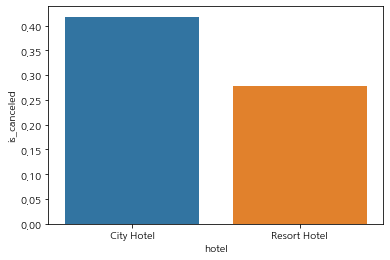

In [8]:
sns.barplot(data = data.reset_index(), x='hotel', y = 'is_canceled')

### 패키지 여행

In [9]:
hotel_bookings_data[['hotel',"Package(bool)",'is_canceled']].groupby(['Package(bool)']).mean()

,is_canceled
Package(bool),
0.0,0.174868
1.0,0.398111


In [10]:
hotel_bookings_data[['hotel',"Package(bool)",'is_canceled']].groupby(['hotel','Package(bool)']).mean()

is_canceled
hotel        Package(bool)             
City Hotel   0.0               0.182249
             1.0               0.439787
Resort Hotel 0.0               0.168532
             1.0               0.304344

In [13]:
hotel_bookings_data[['hotel',"family",'is_canceled']].groupby(['family']).mean()

,is_canceled
family,
0,0.372581
1,0.348842


In [14]:
hotel_bookings_data[['hotel',"family",'is_canceled']].groupby(['hotel','family']).mean()

is_canceled
hotel        family             
City Hotel   0          0.423052
             1          0.343750
Resort Hotel 0          0.269201
             1          0.355561

### 특별한 요청이 있을 때

In [15]:
hotel_bookings_data.groupby('total_of_special_requests').size()

total_of_special_requests
0    70201
1    33183
2    12952
3     2494
4      340
5       40
dtype: int64

In [16]:
hotel_bookings_data[['hotel','total_of_special_requests','is_canceled']].groupby(['total_of_special_requests']).mean()

,is_canceled
total_of_special_requests,
0,0.477686
1,0.220474
2,0.221279
3,0.178428
4,0.105882
5,0.050000


In [17]:
hotel_bookings_data[['hotel','total_of_special_requests','is_canceled']].groupby(['hotel','total_of_special_requests']).mean()

is_canceled
hotel        total_of_special_requests             
City Hotel   0                             0.550018
             1                             0.220751
             2                             0.214031
             3                             0.176136
             4                             0.106061
             5                             0.038462
Resort Hotel 0                             0.322803
             1                             0.219973
             2                             0.233478
             3                             0.182418
             4                             0.105634
             5                             0.071429

### 월별 취소비율

In [18]:
hotel_bookings_data[['hotel','arrival_date_month(int)','is_canceled']].groupby(['arrival_date_month(int)']).mean()

,is_canceled
arrival_date_month(int),
1,0.305016
2,0.334451
3,0.322277
4,0.407835
5,0.397029
6,0.414860
7,0.374644
8,0.377823
9,0.391905


In [19]:
hotel_bookings_data[['hotel','arrival_date_month(int)','is_canceled']].groupby(['hotel','arrival_date_month(int)']).mean()

is_canceled
hotel        arrival_date_month(int)             
City Hotel   1                           0.397051
             2                           0.383636
             3                           0.370687
             4                           0.463114
             5                           0.444350
             6                           0.447305
             7                           0.408995
             8                           0.401472
             9                           0.420590
             10                          0.430340
             11                          0.382841
             12                          0.422217
Resort Hotel 1                           0.148334
             2                           0.255964
             3                           0.228854
             4                           0.293433
             5                           0.287721
             6                           0.330815
             7                           0.314017
             8                           0.334491
             9                           0.323681
             10                          0.275260
             11                          0.188912
             12                          0.238563

In [20]:
# 큰차이 없음

In [21]:
hotel_bookings_data[['hotel','arrival_date_year','is_canceled']].groupby(['arrival_date_year']).mean()

,is_canceled
arrival_date_year,
2015,0.370601
2016,0.358935
2017,0.387346


### 재방문고객, 이전 취소

In [22]:
hotel_bookings_data[['hotel','is_repeated_guest','is_canceled']].groupby(['is_repeated_guest']).mean()

,is_canceled
is_repeated_guest,
0,0.378061
1,0.146471


In [23]:
hotel_bookings_data[['hotel','is_repeated_guest','is_canceled']].groupby(['hotel','is_repeated_guest']).mean()

is_canceled
hotel        is_repeated_guest             
City Hotel   0                     0.422875
             1                     0.222054
Resort Hotel 0                     0.287674
             1                     0.062430

In [24]:
hotel_bookings_data[['hotel','is_repeated_guest','is_canceled']].groupby(['is_repeated_guest']).size()

is_repeated_guest
0    115455
1      3755
dtype: int64

In [25]:
hotel_bookings_data[['hotel','previous_cancellations','is_canceled']].groupby(['previous_cancellations']).mean()

,is_canceled
previous_cancellations,
0,0.339383
1,0.944444
2,0.333333
3,0.307692
4,0.225806
5,0.105263
6,0.318182
11,0.285714
13,0.916667


In [26]:
hotel_bookings_data[['hotel','previous_cancellations','is_canceled']].groupby(['previous_cancellations']).size()

previous_cancellations
0     112731
1       6048
2        114
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
dtype: int64

In [27]:
hotel_bookings_data[['hotel','previous_bookings_not_canceled','is_canceled']].groupby(['previous_bookings_not_canceled']).mean().head(20)

,is_canceled
previous_bookings_not_canceled,
0,0.380624
1,0.051365
2,0.055172
3,0.051051
4,0.052402
5,0.060773
6,0.026549
7,0.056818
8,0.042857


In [28]:
hotel_bookings_data[['hotel','booking_changes','is_canceled']].groupby(['booking_changes']).mean()

,is_canceled
booking_changes,
0,0.408655
1,0.142429
2,0.202646
3,0.157549
4,0.182561
5,0.173913
6,0.295082
7,0.103448
8,0.285714


### 방타입

In [29]:
hotel_bookings_data[['hotel','reserved_room_type','is_canceled']].groupby(['reserved_room_type']).mean()

,is_canceled
reserved_room_type,
A,0.391567
B,0.329148
C,0.330827
D,0.318108
E,0.292683
F,0.304077
G,0.364723
H,0.407654
L,0.333333


### 고객타입

In [30]:
hotel_bookings_data[['hotel','customer_type','is_canceled']].groupby(['customer_type']).mean()

,is_canceled
customer_type,
Contract,0.309921
Group,0.101045
Transient,0.407864
Transient-Party,0.254504


In [31]:
hotel_bookings_data[['hotel','customer_type','is_canceled']].groupby(['hotel','customer_type']).size()

hotel         customer_type  
City Hotel    Contract            2296
              Group                291
              Transient          59272
              Transient-Party    17304
Resort Hotel  Contract            1776
              Group                283
              Transient          30204
              Transient-Party     7784
dtype: int64

### 주차공간 요청 여부

In [6]:
hotel_bookings_data[['hotel','parkinglot','is_canceled']].groupby(['parkinglot']).size()

parkinglot
0.0    111801
1.0      7409
dtype: int64

In [8]:
hotel_bookings_data[['hotel','parkinglot','is_canceled']].groupby(['hotel','parkinglot']).mean()

is_canceled
hotel        parkinglot             
City Hotel   0.0            0.428246
             1.0            0.000000
Resort Hotel 0.0            0.321778
             1.0            0.000000

# --------------------------------------------------------------------------------------

## 상관계수 구하기

In [32]:
hotel_bookings_data['precan_bool'] = 1
hotel_bookings_data.loc[hotel_bookings_data['previous_cancellations'] == 0, 'precan_bool'] = 0

hotel_bookings_data['prebook_bool'] = 1
hotel_bookings_data.loc[hotel_bookings_data['previous_bookings_not_canceled'] == 0, 'prebook_bool'] = 0

In [34]:
hotel_bookings_data['reserve_change'] = 0
hotel_bookings_data.loc[hotel_bookings_data['booking_changes'] > 0, 'reserve_change'] = 1 

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
        
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Mal' in f.name]
import matplotlib.pyplot as plt
plt.rc('font', family="Malgun Gothic")

In [50]:
numerical_columns = [column for column in hotel_bookings_data.columns if hotel_bookings_data.dtypes[column] != 'object']

corr = hotel_bookings_data[numerical_columns].corr()

corr = np.abs(corr)
corr = corr.reset_index().sort_values(by='is_canceled',ascending=False)
corr

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,group_total,is_group,Package(bool),meal(bool),arrival_date_month(int),family,precan_bool,prebook_bool,reserve_change,parkinglot
0,is_canceled,1.000000,0.292876,0.016622,0.008315,0.005948,0.001323,0.025542,0.058182,0.004862,...,0.044811,0.019159,0.151574,0.006571,0.011179,0.013059,0.271021,0.115446,0.271021,0.197606
1,lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,0.037886,...,0.070225,0.046493,0.161557,0.097156,0.131603,0.044377,0.206901,0.131534,0.206901,0.118285
32,reserve_change,0.271021,0.206901,0.270489,0.083317,0.011824,0.053744,0.057739,0.032667,0.054749,...,0.058700,0.080308,0.060155,0.066352,0.083760,0.060478,1.000000,0.096617,1.000000,0.044243
30,precan_bool,0.271021,0.206901,0.270489,0.083317,0.011824,0.053744,0.057739,0.032667,0.054749,...,0.058700,0.080308,0.060155,0.066352,0.083760,0.060478,1.000000,0.096617,1.000000,0.044243
21,reserved==assigned,0.246768,0.141136,0.097892,0.006965,0.005006,0.079274,0.094213,0.054619,0.012470,...,0.048058,0.016213,0.059928,0.050454,0.005195,0.010812,0.068698,0.105156,0.068698,0.081713
19,total_of_special_requests,0.234877,0.095949,0.108610,0.026202,0.003026,0.073124,0.068738,0.123353,0.081756,...,0.157317,0.164792,0.017446,0.050431,0.028086,0.128328,0.111573,0.031916,0.111573,0.083601
33,parkinglot,0.197606,0.118285,0.014994,0.002914,0.008437,0.019642,0.026255,0.014265,0.056898,...,0.048110,0.053315,0.142090,0.052668,0.001247,0.069779,0.044243,0.103861,0.044243,1.000000
18,required_car_parking_spaces,0.195701,0.116624,0.013812,0.001980,0.008569,0.018520,0.024933,0.014438,0.056245,...,0.047833,0.052763,0.139931,0.052136,0.000325,0.069090,0.043928,0.104899,0.043928,0.990361
26,Package(bool),0.151574,0.161557,0.000503,0.015998,0.011886,0.036917,0.027396,0.006700,0.050277,...,0.029496,0.047164,1.000000,0.067729,0.017264,0.065541,0.060155,0.070749,0.060155,0.142090
13,booking_changes,0.144832,0.002230,0.031416,0.006311,0.011266,0.050191,0.080018,0.041472,0.050997,...,0.006728,0.090257,0.101638,0.022368,0.005570,0.081885,0.062796,0.022874,0.062796,0.067255


In [53]:
corr = corr.drop([20,23,22])[1:]

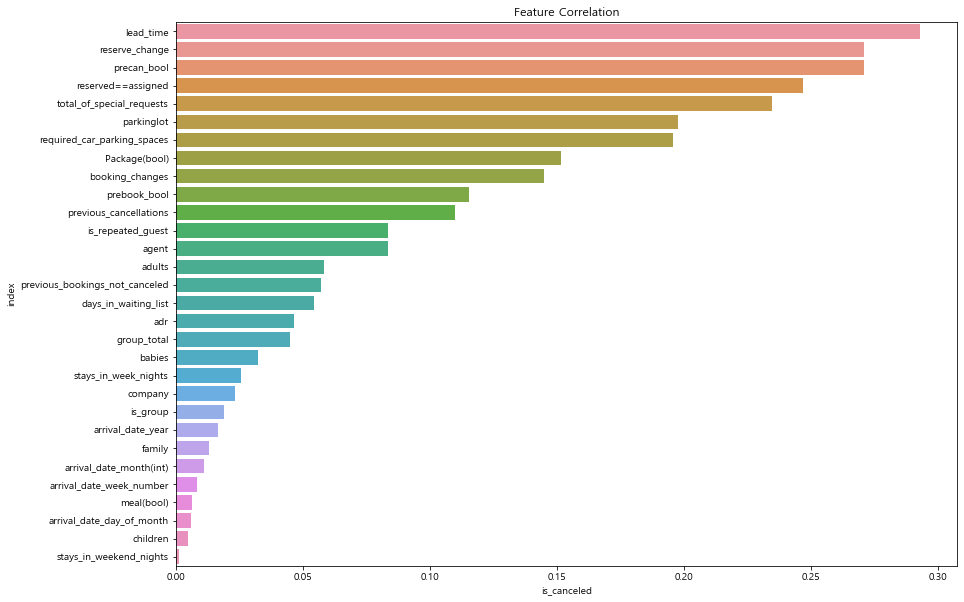

In [54]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=corr,y='index',x='is_canceled')
ax.title.set_text('Feature Correlation')
plt.show()